# Assignment 1

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Classification using KNN

Let's set up our workspace and use the **Wine dataset** from `scikit-learn`. This dataset contains 178 wine samples with 13 chemical features, used to classify wines into different classes based on their origin.

The **response variable** is `class`, which indicates the type of wine. We'll use all of the chemical features to predict this response variable.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Bind the 'class' (wine target) to the DataFrame
wine_df['class'] = wine_data.target

# Display the DataFrame
wine_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


#### **Question 1:** 
#### Data inspection

Before fitting any model, it is essential to understand our data. **Use Python code** to answer the following questions about the **Wine dataset**:

_(i)_ How many observations (rows) does the dataset contain?

In [3]:
# MY ANSWER BELOW: 

# Using panda library, where "df.shape" returns the 'dimensions' of the dataframe (rows, columns)
# I use the 1st element .shape[0] to get the the number of rows, and likewise .shape[1] to get the number of columns from the df. 
print('Number of observations: ',wine_df.shape[0])


Number of observations:  178


_(ii)_ How many variables (columns) does the dataset contain?

In [4]:
# As described in (i), I use .shape[1] to get the number of columns from the df. 
print('Number of variables: ',wine_df.shape[1])

Number of variables:  14


_(iii)_ What is the 'variable type' of the response variable `class` (e.g., 'integer', 'category', etc.)? What are the 'levels' (unique values) of the variable?

In [5]:
# Using panda library, ".dtype" returns the datatype and ".unique()" returns the list of unique values. 
print(
    "Data type of the response variable 'class': " ,wine_df['class'].dtype 
    ,'\n'
    ,"Levels (unique values) of the response variable 'class': " ,wine_df['class'].unique()
    )

Data type of the response variable 'class':  int32 
 Levels (unique values) of the response variable 'class':  [0 1 2]


In [6]:
# Since it returns the continuous datatype INTEGER for the elected response variable 'class', I should now change the type to 'categorical' - which is generally recommended for KNN classification. 
wine_df['class'] = wine_df['class'].astype('category')
print(
    "Data type of the response variable 'class': " ,wine_df['class'].dtype 
    ,'\n'
    ,"Levels (unique values) of the response variable 'class': " ,wine_df['class'].unique()
    )

Data type of the response variable 'class':  category 
 Levels (unique values) of the response variable 'class':  [0, 1, 2]
Categories (3, int32): [0, 1, 2]



_(iv)_ How many predictor variables do we have (Hint: all variables other than `class`)? 

In [7]:
# As per (ii), the ".shape[1]" gives the number of columns. 
# Number of predictor variables = number of columns (ie. .shape[1]) - number of response variable (ie. 1)
print("Number of predictor variables: " ,wine_df.shape[1] - 1) 

Number of predictor variables:  13


You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:** 
#### Standardization and data-splitting

Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the scaler method, provided as follows:

In [8]:
# Select predictors (excluding the last column)
predictors = wine_df.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

(i) Why is it important to standardize the predictor variables?

In [9]:
# MY ANSWER BELOW: 

# Let's see the UNSTANDARDIZED data:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


> MY ANSWER (continued): As per lecture note "Classification_I.pdf", in KNN classification, the SCALE of each variable affects predictions. Variables with larger scales (e.g., magnesium), if UNSTANDARDIZED, will dominate the prediction process due to their larger distance calculation values. So, standardizing each variable helps to ensure fair contribution from all variables. since each variable's data are adjusted to have a mean of 0 and a standard deviation of 1. 


(ii) Why did we elect not to standard our response variable `Class`?

> MY ANSWER: The response variable 'class' is CATEGORICAL, representing different classes of wine (e.g. 0, 1, 2). Standardization is used for continuous variables. If we standardize a categorical variable, it would transform its values into a continuous scale (e.g., 1.3), whereas we want to squarely categorize an unknown data as "0" or "1" or "2" wine class. 

(iii) A second essential step is to set a random seed. Do so below (Hint: use the random.seed function). Why is setting a seed important? Is the particular seed value important? Why or why not?

In [10]:
# Do not touch
random.seed(123)

> MY ANSWER: As per covered in lecture (slide "Classification_II.pdf), setting a random seed is important for reproducibility. In particular, if we don't set "random seed", then every time someone runs/re-runs the code, a different set of random numbers sequence will be generated each time, resulting in different random patterns and the elected Machine Learning model's output will give different values and accuracy each time. So, for reproducability purposes, we should set random seed for reproducibility, in other words, to get the same random patterns and output results and accuracy. 

(iv) A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. 

Extend the code to create a non-overlapping test set for the predictors and response variables.

In [11]:
# Create a random vector of True and False values to split the data
np.random.seed(123) # MY NOTE: THIS IS CRUCIAL (THE GIVEN CODE "random.seed(123)" IN THE ASSIGNMENT WILL NOT WORK FOR NUMPY ARRAYS)
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# MY ANSWER BELOW: 
training_set_predictors = predictors_standardized[split] 
training_set_response = wine_df['class'][split] # since we have elected "class" as the response variable. 

test_set_predictors = predictors_standardized[~split]
test_set_response = wine_df['class'][~split] # since we have elected "class" as the response variable.  


In [12]:
# MY ANSWER (continued): 

# Verify the shapes of the resulting sets: 

print(
    "Training Set - Shapes:"
    ,'\n'
    ,"Predictors: ", training_set_predictors.shape
    ,"; Response: ", training_set_response.shape
    ,'\n'
    "Test Set - Shapes:"
    ,'\n'
    ,"Predictors: ", test_set_predictors.shape
    ,"; Response: ", test_set_response.shape
    )

Training Set - Shapes: 
 Predictors:  (140, 13) ; Response:  (140,) 
Test Set - Shapes: 
 Predictors:  (38, 13) ; Response:  (38,)


#### **Question 3:**
#### Model initialization and cross-validation
We are finally set to fit the KNN model. 


Perform a grid search to tune the `n_neighbors` hyperparameter using 10-fold cross-validation. Follow these steps:

1. Initialize the KNN classifier using `KNeighborsClassifier()`.
2. Define a parameter grid for `n_neighbors` ranging from 1 to 50.
3. Implement a grid search using `GridSearchCV` with 10-fold cross-validation to find the optimal number of neighbors.
4. After fitting the model on the training data, identify and return the best value for `n_neighbors` based on the grid search results.

In [13]:
# MY ANSWER BELOW: 

# 1. Initialize the KNN classifier using `KNeighborsClassifier()`:
knn = KNeighborsClassifier()

# 2. Define a parameter grid for `n_neighbors` ranging from 1 to 50:
parameter_grid = {'n_neighbors': range(1,51)}

# 3. Implement a grid search using `GridSearchCV` with 10-fold cross-validation to find the optimal number of neighbors:
wine_class_tune_grid = GridSearchCV(estimator=knn,param_grid=parameter_grid,cv=10,scoring='accuracy')

# 4 Fit the model on the training data:  
wine_class_tune_grid.fit(training_set_predictors, training_set_response)

# 5. identify and return the best value for `n_neighbors` based on the grid search results: 
best_n = wine_class_tune_grid.best_params_['n_neighbors'] # this variable assignment is for the question below 
print ("The best n value for n_neighbors: ", best_n)



The best n value for n_neighbors:  8


In [20]:
# The output suggests 8 is the optimal number of neighbors for this wine KNN classifier. 

#### **Question 4:**
#### Model evaluation

Using the best value for `n_neighbors`, fit a KNN model on the training data and evaluate its performance on the test set using `accuracy_score`.

In [26]:
# MY ANSWER BELOW: 

# Fit a KNN model on the training data using the best n value for n_neighbors: 
knn_best = KNeighborsClassifier(n_neighbors=best_n)
knn_best.fit(training_set_predictors, training_set_response)

# Predict on the test set: 
PREDICT_test_set_response = knn_best.predict(test_set_predictors)

# Evaluate the performance using 'accuracy_score': 
print('Accuracy: ' ,accuracy_score(test_set_response, PREDICT_test_set_response))

Accuracy:  0.9473684210526315


Intepretation: Choosing 8 neighbors gives the most optimal accuracy, with an accurate score of close to 95%. 

Although not asked in the assigment, I would like to run the codes below to verify the accuracies grid.

In [27]:
# Referencing the code from "Classification-2.ipynb" LIVE CODE notebook: 

accuracies_grid = pd.DataFrame(wine_class_tune_grid.cv_results_)
accuracies_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      50 non-null     float64
 1   std_fit_time       50 non-null     float64
 2   mean_score_time    50 non-null     float64
 3   std_score_time     50 non-null     float64
 4   param_n_neighbors  50 non-null     int32  
 5   params             50 non-null     object 
 6   split0_test_score  50 non-null     float64
 7   split1_test_score  50 non-null     float64
 8   split2_test_score  50 non-null     float64
 9   split3_test_score  50 non-null     float64
 10  split4_test_score  50 non-null     float64
 11  split5_test_score  50 non-null     float64
 12  split6_test_score  50 non-null     float64
 13  split7_test_score  50 non-null     float64
 14  split8_test_score  50 non-null     float64
 15  split9_test_score  50 non-null     float64
 16  mean_test_score    50 non-nu

In [15]:
# Referencing the code from "Classification-2.ipynb" LIVE CODE notebook: 

accuracies_grid["sem_test_score"] = accuracies_grid["std_test_score"] / 10**(1/2)
accuracies_grid = (
    accuracies_grid[[
        "param_n_neighbors",
        "mean_test_score",
        "sem_test_score"
    ]]
    .rename(columns={"n_neighbors": "param_n_neighbors"})
)
accuracies_grid

,param_n_neighbors,mean_test_score,sem_test_score
0,1,0.935714,0.015811
1,2,0.957143,0.014983
2,3,0.950000,0.014463
3,4,0.950000,0.014463
4,5,0.964286,0.011294
5,6,0.964286,0.011294
6,7,0.971429,0.011066
7,8,0.978571,0.010351
8,9,0.964286,0.011294
9,10,0.971429,0.011066


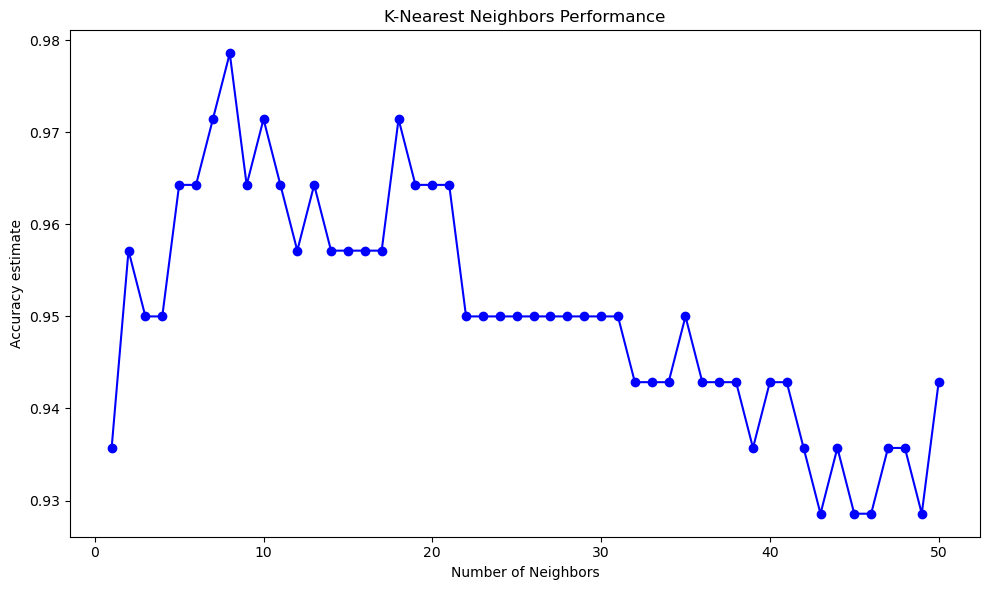

In [16]:
# Referencing the code from "Classification-2.ipynb" LIVE CODE notebook: 

# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracies_grid['param_n_neighbors'], accuracies_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

Plot intepretation: 
- Choosing 8 neighbors gives the highest cross-validation accuracy estimate at close to 98%, suggesteing the model will perform well. 
- Nearby values (e.g., slightly higher or lower) don't significantly decrease accuracy (they're all above 0.95), ensuring reliability.
- Training costs are manageable (e.g., not excessively large parameters that make predictions costly).


Underfitting and Overfitting

As the number of neighbors ($k$) increases, the cross-validation accuracy declines, suggesting that a large k would make the model too general and consequently 'underfit' the data.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is inspected for number of variables, observations and data types. | Data inspection is missing or incomplete.         |
| **Data Scaling**                                       | Data scaling or normalization is applied where necessary (e.g., using `StandardScaler`). | Data scaling or normalization is missing or incorrectly applied. |
| **Model Initialization**                               | The KNN model is correctly initialized and a random seed is set for reproducibility.            | The KNN model is not initialized, is incorrect, or lacks a random seed for reproducibility. |
| **Parameter Grid for `n_neighbors`**                   | The parameter grid for `n_neighbors` is correctly defined. | The parameter grid is missing or incorrectly defined. |
| **Cross-Validation Setup**                             | Cross-validation is set up correctly with 10 folds. | Cross-validation is missing or incorrectly set up. |
| **Best Hyperparameter (`n_neighbors`) Selection**       | The best value for `n_neighbors` is identified using the grid search results. | The best `n_neighbors` is not selected or incorrect. |
| **Model Evaluation on Test Data**                      | The model is evaluated on the test data using accuracy. | The model evaluation is missing or uses the wrong metric. |


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
